## In this file, we have tried to find out some correlation spefically for males

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("cleanedMale.csv")
df = df.drop("Gender", axis=1)
df.head(1)

,CGPA,10th Class Board,10th Class Science Marks (out of 100),10th Class Maths Marks (out of 100),10th Class English/Language Marks (out of 100),10th Class Overall Percentage,12th Class School Category,12th Class Board,12th Class Physics Marks (out of 100),12th Class Maths Marks (out of 100),...,12th Class English/Language Marks (out of 100),12th Class Overall Percentage,JEE Mains Session 1 Maths Percentile,JEE Mains Session 1 Physics Percentile,JEE Mains Session 1 Chemistry Percentile,JEE Mains Session 1 Overall Score,JEE Mains Session 2 Maths Percentile,JEE Mains Session 2 Physics Percentile,JEE Mains Session 2 Chemistry Percentile,JEE Mains Session 2 Overall Percentile
0,8.6,State Board,93,79,76,88.0,Government School,Others,82.0,81.0,...,78,81.4,95.3,58.3,95.7,88.2,89.9,72.6,90.6,84.7


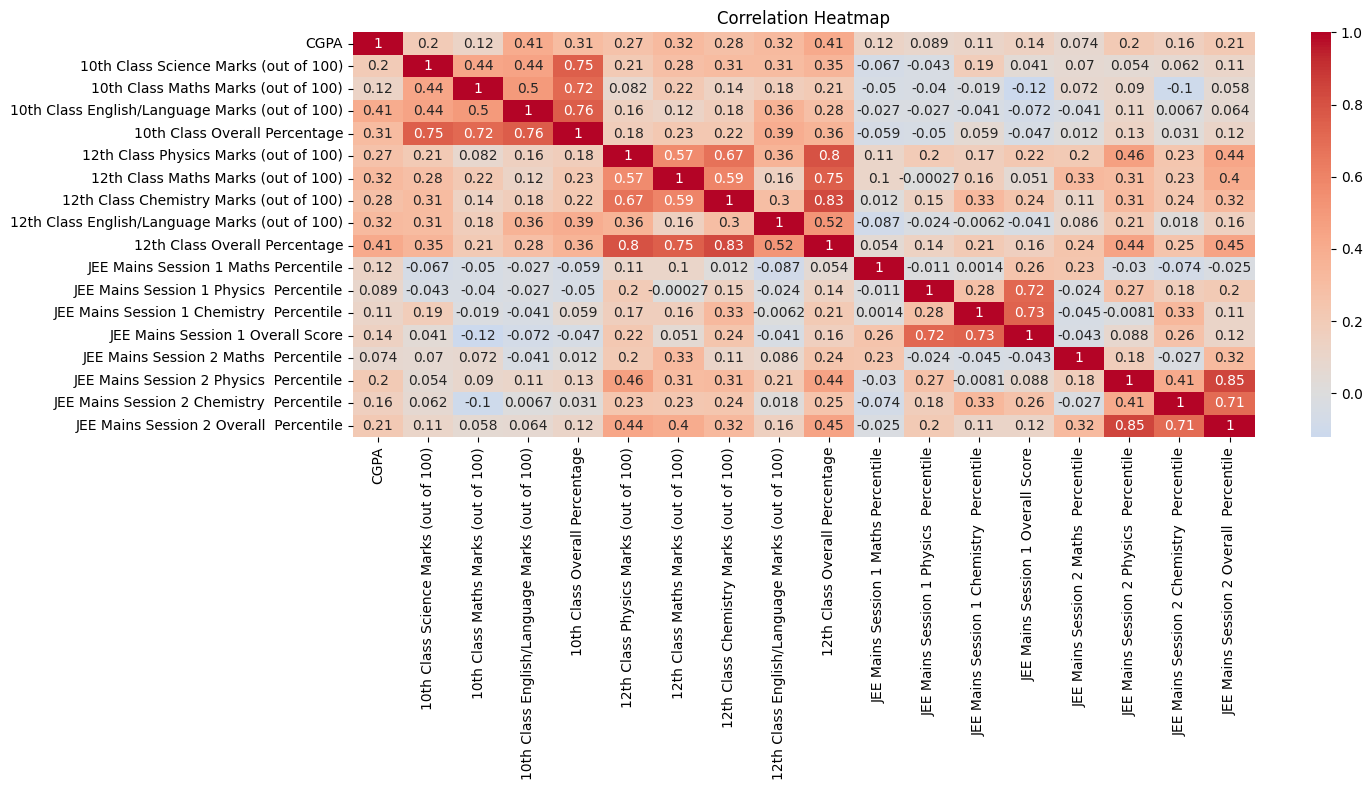

In [15]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numerical_cols].corr()['CGPA'].sort_values(ascending=False)
# display(correlations)

plt.figure(figsize=(15, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# NO solid outcome

In [11]:
df =  df.drop(["10th Class Board","12th Class School Category","12th Class Board"], axis =1)

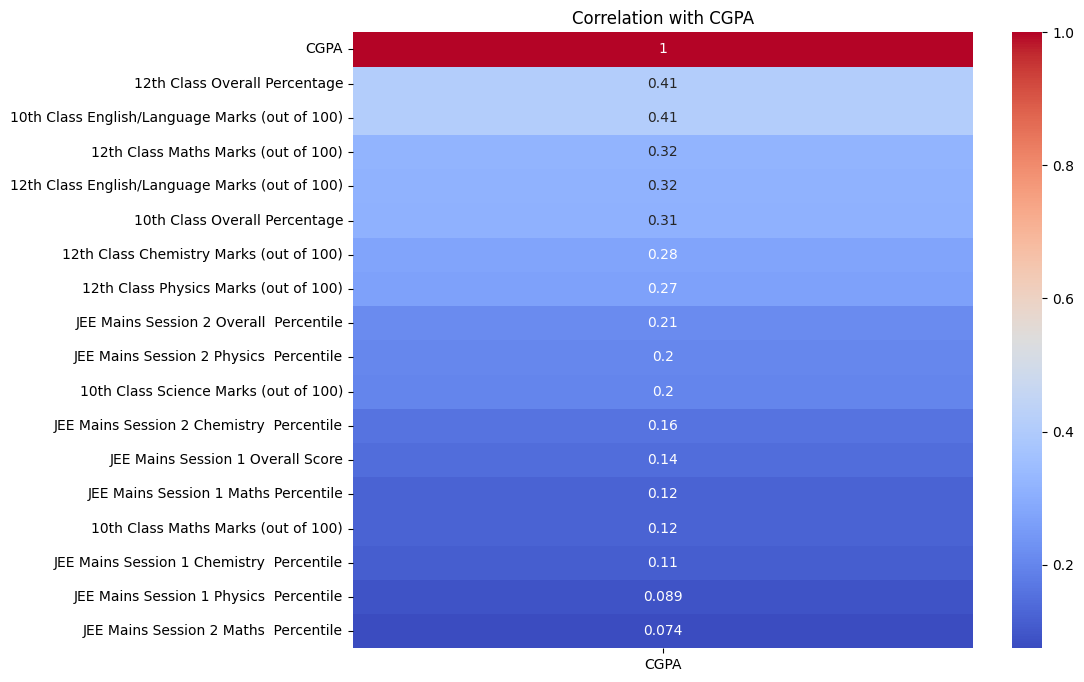

Features with correlation above threshold: ['CGPA', '10th Class Science Marks (out of 100)', '10th Class English/Language Marks (out of 100)', '10th Class Overall Percentage', '12th Class Physics Marks (out of 100)', '12th Class Maths Marks (out of 100)', '12th Class Chemistry Marks (out of 100)', '12th Class English/Language Marks (out of 100)', '12th Class Overall Percentage', 'JEE Mains Session 2 Physics  Percentile', 'JEE Mains Session 2 Overall  Percentile']


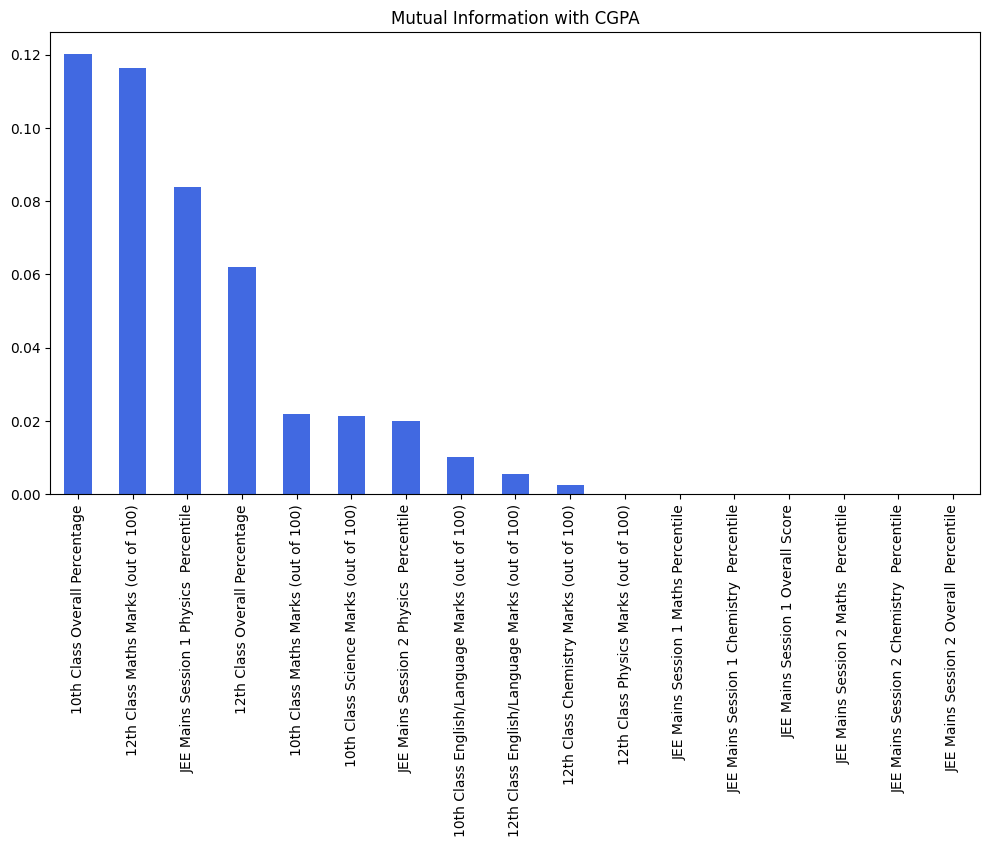

Top features by mutual information: 10th Class Overall Percentage              0.120159
12th Class Maths Marks (out of 100)        0.116490
JEE Mains Session 1 Physics  Percentile    0.083799
12th Class Overall Percentage              0.062157
10th Class Maths Marks (out of 100)        0.021888
dtype: float64


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Calculate correlation matrix
corr_matrix = df.corr()

# Visualize correlations with CGPA
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['CGPA']].sort_values(by='CGPA', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with CGPA")
plt.show()

# Select features with high correlation (threshold > 0.2 for example)
high_corr_features = corr_matrix['CGPA'][corr_matrix['CGPA'].abs() > 0.2].index.tolist()

print("Features with correlation above threshold:", high_corr_features)

# Using Mutual Information for better feature detection
X = df.drop(columns=['CGPA'])  # Features
y = df['CGPA']  # Target

# Compute mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)

# Plot mutual information
mutual_info_series.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='royalblue')
plt.title('Mutual Information with CGPA')
plt.show()

print("Top features by mutual information:", mutual_info_series.nlargest(5))
